# References 
- Bayesian model of disease progression in GNE myopathy  
https://onlinelibrary.wiley.com/doi/full/10.1002/sim.8050

# Each muscle model. 
i is i th subject, k is k th muscle type, $\alpha_i$ is "disease age", $t_i$ is chronological age.
\begin{align}
    Y_{i,k} \sim N(\mu_{i,k}, (\sigma_k \mu_{i,k})^2 + \delta^2 ) ) \\
    \mu_{i, k} = logit^{-1}(\theta_k + \beta_k(t_i - \alpha_i)) 
        = \frac{1}{1 + \exp{ - [\theta_k + \beta_k(t_i - \alpha_i)}]}
\end{align}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"}, font="IPAexGothic")

%load_ext autoreload
%autoreload 2

from typing import Union, Optional, List, Dict, Callable, Any, Tuple
from types import ModuleType
from scipy.special import logit, expit
from scipy.stats import norm
from scipy.optimize import minimize

import vis_utils
import gne_myopathy

/home/toshiaki/.pyenv/versions/3.7.2/envs/douEnv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/toshiaki/.pyenv/versions/3.7.2/envs/douEnv/lib/python3.7/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
df = pd.read_csv("./muscle_data.csv")

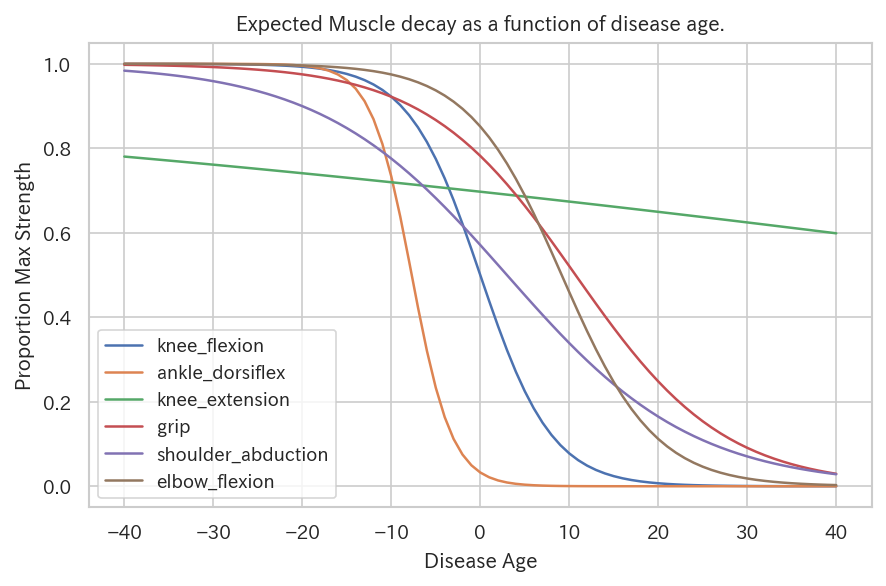

In [108]:
model = gne_myopathy.GNEMyopathyModel(df)
model.muscle_function()

# Estimate disease age. 

In [109]:
dic = {
    'knee_flexion': 0.2 ,
    'ankle_dorsiflex': 0.1,
    'knee_extension': 0.7,
    'grip': 0.7,
    'shoulder_abduction': 0.3,
    'elbow_flexion': 0.9
}

In [110]:
gne_myopathy.disease_age_fit([10], df, dic.values())

1.6762569243847527

In [111]:
res = minimize(fun=gne_myopathy.disease_age_fit,  x0=0, args=(df,dic.values()), method="L-BFGS-B")

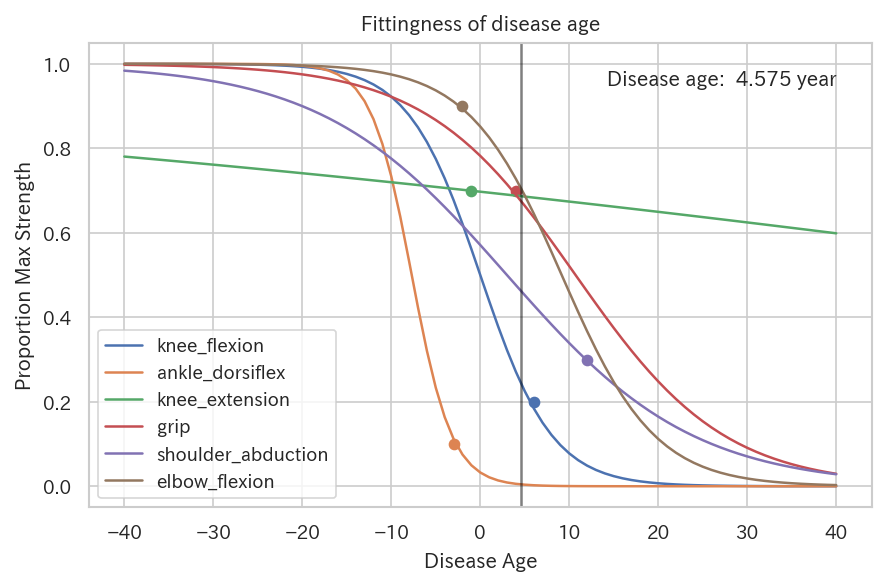

In [123]:
model.input_data(dic.values())
model.disease_age_vis(res.x[0])